## Lib

In [1]:
import pandas as pd
import numpy as np
from training_utils.utils import read_data_frame
from training_utils.optuna_train import OptunaXGBWithCV
from training_utils.assessment import ModelAssessment
import joblib
import pickle
import shap
import os

## Treino e validacao do modelo

In [3]:
X_train = read_data_frame('X_train', '20231021')
y_train = read_data_frame('y_train', '20231021')

X_test = read_data_frame('X_test', '20231021')
y_test = read_data_frame('y_test', '20231021')

# como foi salvo em dataframe precisamos transformar em serie para rodar os modelos
y_train = y_train.flag_Churn
y_test = y_test.flag_Churn

In [6]:
y_test.mean()

0.2654364797728886

In [3]:
optimizer = OptunaXGBWithCV(n_trials=120,n_splits=3, top_k_models=3)
optimizer.Fit(X_train, y_train)

[I 2023-10-21 17:43:09,200] A new study created in memory with name: no-name-ead95cf9-4bac-4766-8d27-116e05b1acb9


  0%|          | 0/120 [00:00<?, ?it/s]

[I 2023-10-21 17:43:09,579] Trial 0 finished with value: 0.6697272529907865 and parameters: {'n_estimators': 274, 'learning_rate': 0.025796474285925332, 'max_depth': 3, 'subsample': 0.2855473384053131}. Best is trial 0 with value: 0.6697272529907865.
[I 2023-10-21 17:43:09,847] Trial 1 finished with value: 0.6457512311676827 and parameters: {'n_estimators': 73, 'learning_rate': 0.016824604448047845, 'max_depth': 7, 'subsample': 0.23939058947520186}. Best is trial 0 with value: 0.6697272529907865.
[I 2023-10-21 17:43:10,099] Trial 2 finished with value: 0.6677840305688036 and parameters: {'n_estimators': 168, 'learning_rate': 0.028295285567955714, 'max_depth': 3, 'subsample': 0.6925363872260133}. Best is trial 0 with value: 0.6697272529907865.
[I 2023-10-21 17:43:10,288] Trial 3 finished with value: 0.6666673325058735 and parameters: {'n_estimators': 108, 'learning_rate': 0.05376168525213105, 'max_depth': 4, 'subsample': 0.8983634743208134}. Best is trial 0 with value: 0.669727252990786

[I 2023-10-21 17:43:29,255] Trial 33 finished with value: 0.6591784851260262 and parameters: {'n_estimators': 94, 'learning_rate': 0.023762734198439828, 'max_depth': 3, 'subsample': 0.3142996904769172}. Best is trial 0 with value: 0.6697272529907865.
[I 2023-10-21 17:43:30,421] Trial 34 finished with value: 0.6579981054312674 and parameters: {'n_estimators': 435, 'learning_rate': 0.030285854215455054, 'max_depth': 4, 'subsample': 0.5170927541817324}. Best is trial 0 with value: 0.6697272529907865.
[I 2023-10-21 17:43:31,414] Trial 35 finished with value: 0.6655467899484254 and parameters: {'n_estimators': 353, 'learning_rate': 0.015709929810011902, 'max_depth': 4, 'subsample': 0.680644018473166}. Best is trial 0 with value: 0.6697272529907865.
[I 2023-10-21 17:43:32,306] Trial 36 finished with value: 0.668197567042148 and parameters: {'n_estimators': 397, 'learning_rate': 0.023678473727676216, 'max_depth': 3, 'subsample': 0.37984016312226127}. Best is trial 0 with value: 0.669727252990

[I 2023-10-21 17:44:00,104] Trial 66 finished with value: 0.6674863145052617 and parameters: {'n_estimators': 153, 'learning_rate': 0.0297914627926839, 'max_depth': 3, 'subsample': 0.6879544033198511}. Best is trial 0 with value: 0.6697272529907865.
[I 2023-10-21 17:44:00,724] Trial 67 finished with value: 0.6608798334366736 and parameters: {'n_estimators': 210, 'learning_rate': 0.012290963264583774, 'max_depth': 4, 'subsample': 0.7519601223840864}. Best is trial 0 with value: 0.6697272529907865.
[I 2023-10-21 17:44:01,574] Trial 68 finished with value: 0.6687114013308483 and parameters: {'n_estimators': 379, 'learning_rate': 0.016042866854565928, 'max_depth': 3, 'subsample': 0.5010755785423933}. Best is trial 0 with value: 0.6697272529907865.
[I 2023-10-21 17:44:01,908] Trial 69 finished with value: 0.6624699239294858 and parameters: {'n_estimators': 104, 'learning_rate': 0.026391309635080303, 'max_depth': 3, 'subsample': 0.645165485007557}. Best is trial 0 with value: 0.6697272529907

[I 2023-10-21 17:44:28,859] Trial 99 finished with value: 0.6691580314010613 and parameters: {'n_estimators': 368, 'learning_rate': 0.01850019014687748, 'max_depth': 3, 'subsample': 0.3235114925845884}. Best is trial 0 with value: 0.6697272529907865.
[I 2023-10-21 17:44:29,889] Trial 100 finished with value: 0.6634331179249825 and parameters: {'n_estimators': 373, 'learning_rate': 0.01638721620988087, 'max_depth': 4, 'subsample': 0.292437104274354}. Best is trial 0 with value: 0.6697272529907865.
[I 2023-10-21 17:44:30,774] Trial 101 finished with value: 0.6682415486224181 and parameters: {'n_estimators': 395, 'learning_rate': 0.01796459689852078, 'max_depth': 3, 'subsample': 0.3252455345584802}. Best is trial 0 with value: 0.6697272529907865.
[I 2023-10-21 17:44:31,662] Trial 102 finished with value: 0.6666630859852544 and parameters: {'n_estimators': 423, 'learning_rate': 0.025038804441619367, 'max_depth': 3, 'subsample': 0.3238173526400148}. Best is trial 0 with value: 0.66972725299

In [4]:
# Agora preciso selecionar os melhores modelos com uma diferenca entre o score do treino e test de até 5%
runs_to_assess = optimizer.Select_best_models(0.05)
for row in range(len(runs_to_assess)):
    params = runs_to_assess.iloc[row].params
    run_id = runs_to_assess.iloc[row].run_id
    # treinando os top_k_models 
    model = optimizer.train_model(params)
    # fazendo avaliação dos modelos
    model_performance = ModelAssessment(model, X_test, y_test)
    model_performance.build_metric_table(X_train, y_train)
    #salvando o modelo e a avaliação do mesmo
    joblib.dump(model, f'artifacts/model_{run_id}.pkl')
    joblib.dump(model_performance, f'artifacts/model_performance_{run_id}.pkl')
    

# Escolhendo o melhor modelo

model_performance_108.pkl
      Avg_precision Roc_AUC
train         0.698   0.867
test          0.655    0.84
LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responder

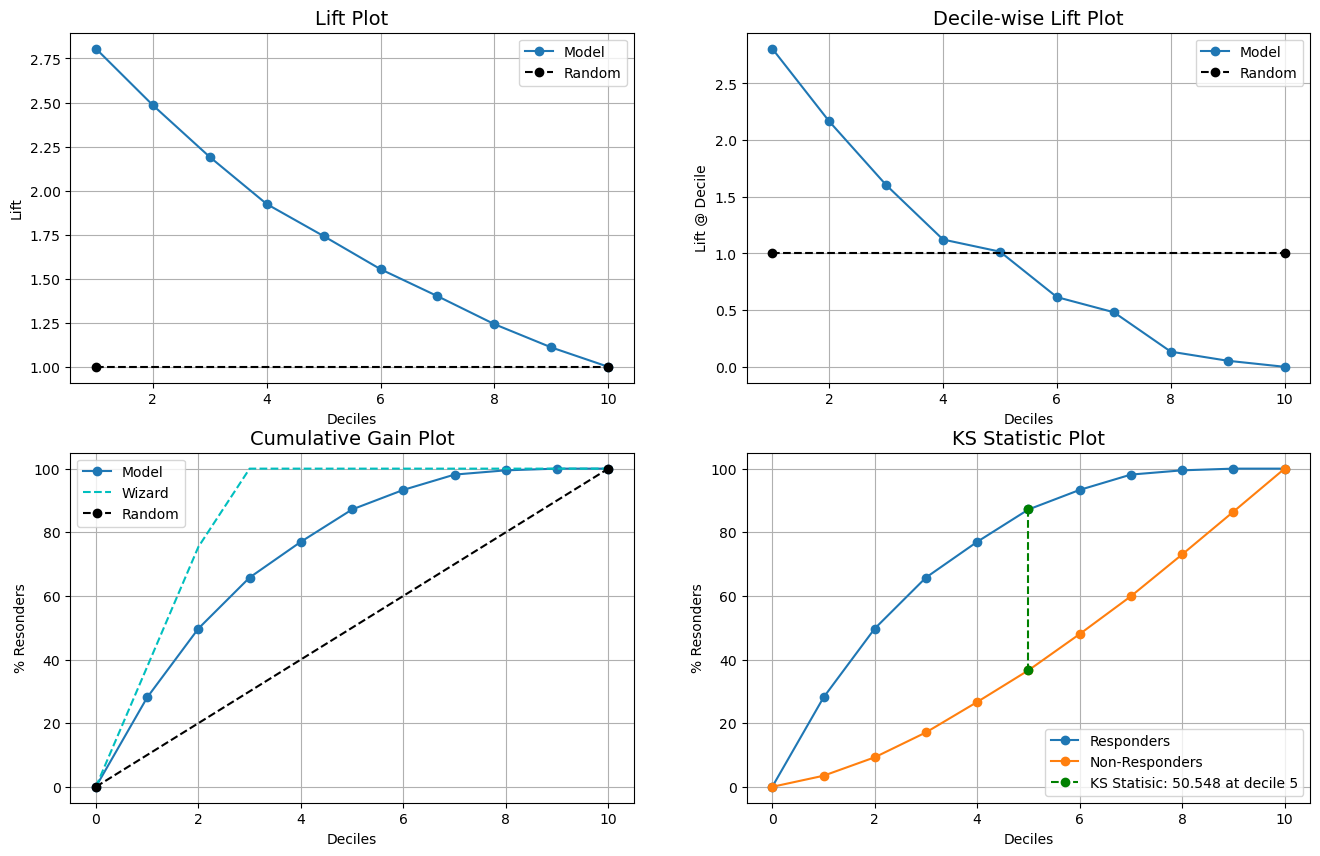

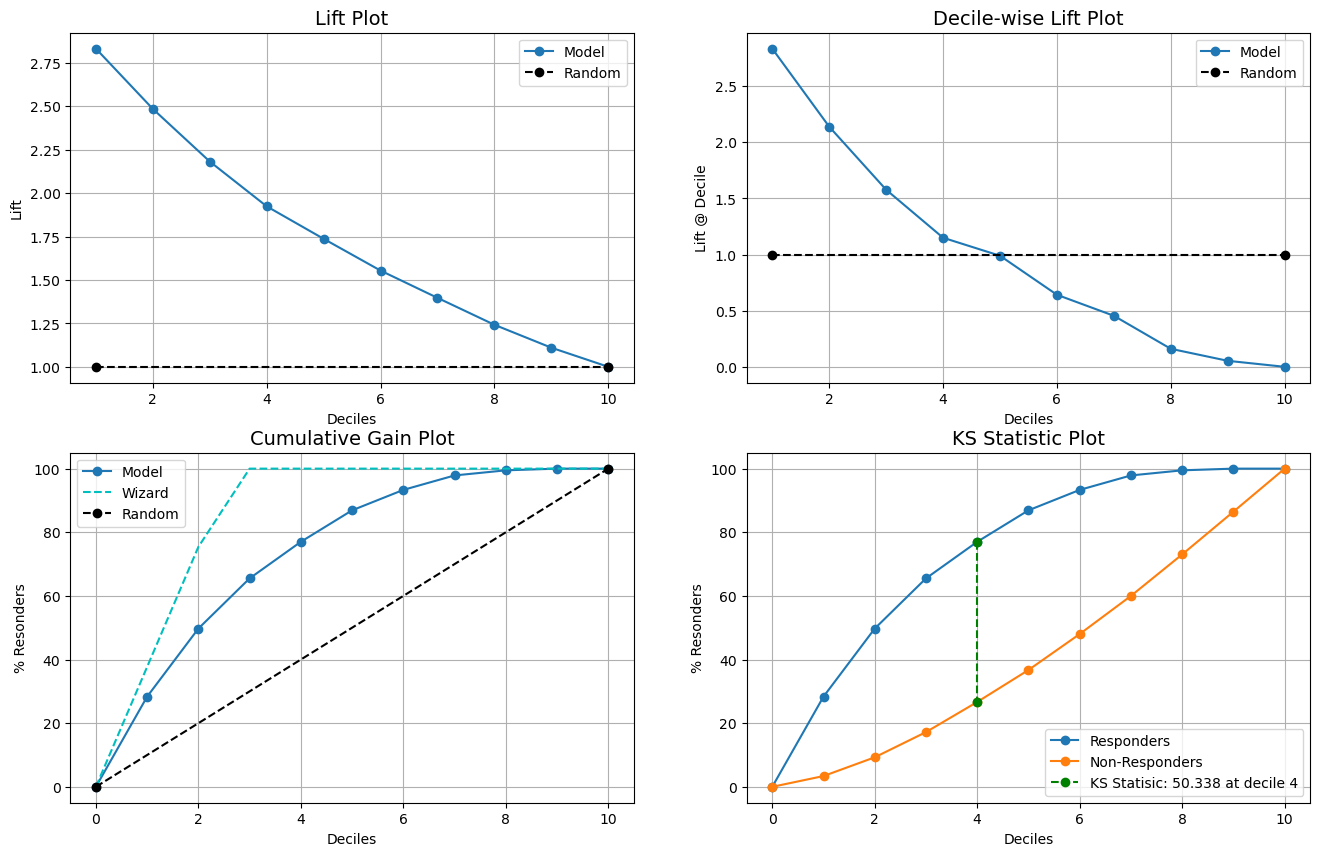

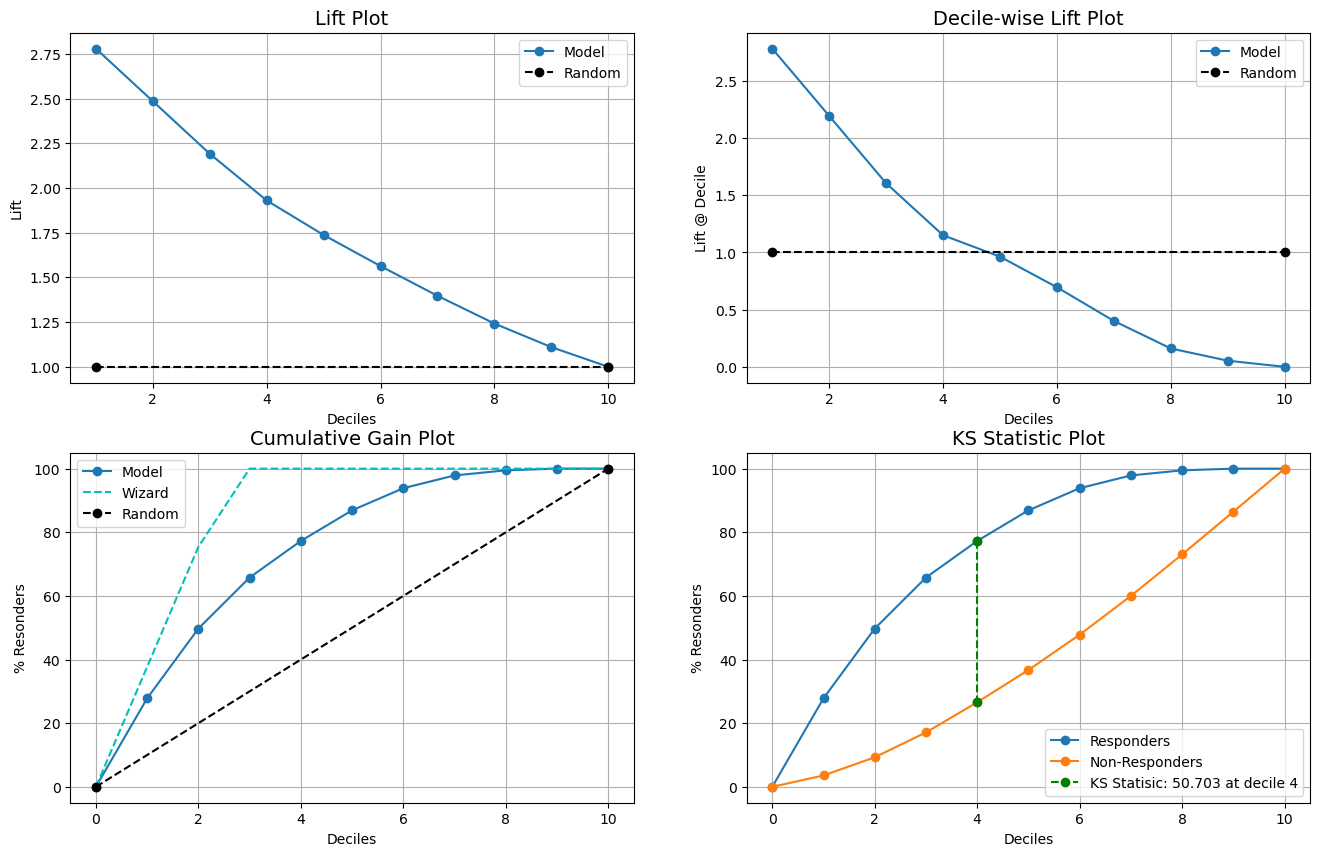

In [10]:
# lendo todos modelos salvos e printando as estatisticas principais para escolher o melhor
file_names = os.listdir('artifacts')
for i in file_names:
    if 'performance' in i:
        print(i)
        model_perf = joblib.load(f'artifacts/{i}')
        print(model_perf.metrics_table)
        print(model_perf.kds())

In [6]:
#considerando a performance e o plot do kds, vamos continuar com o modelo 11

## Assessment do melhor modelo

In [7]:
model_perf = joblib.load(f'artifacts/model_performance_11.pkl')
model = joblib.load(f'artifacts/model_11.pkl')

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

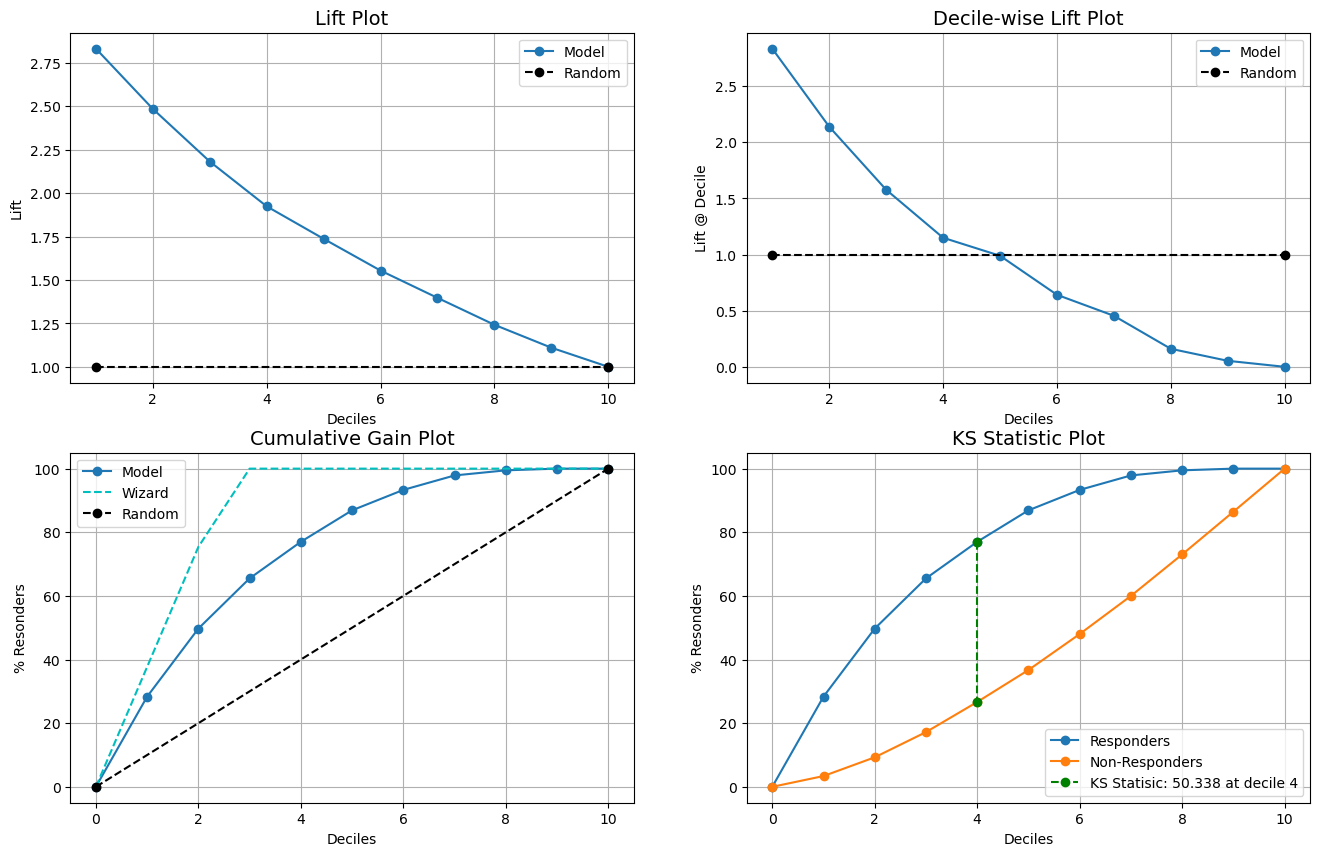

In [24]:
model_perf.kds()

[17:46:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


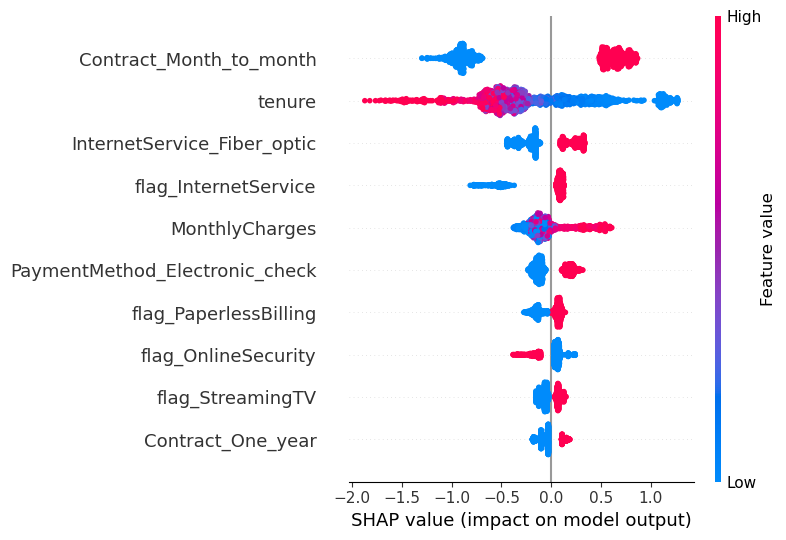

In [14]:
model_perf.compute_shap_values()

[11:19:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


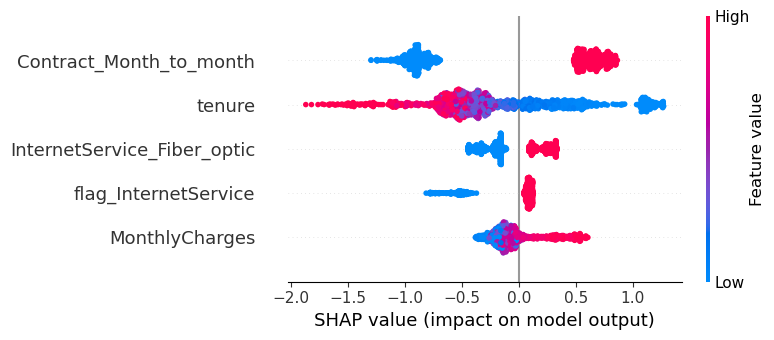

In [10]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, max_display = 5)

In [12]:
df, calibr_df = model_perf.calculate_calibration()
calibr_df

,pred_prob,target
classe_churn,,
1,0.014872,0.000000
2,0.027217,0.014184
3,0.044874,0.042553
4,0.083958,0.120567
5,0.147140,0.177305
6,0.225309,0.257143
7,0.336200,0.304965
8,0.456464,0.418440
9,0.596468,0.567376


In [13]:
vars_analys = ['Contract_Month_to_month',
               'tenure','MonthlyCharges',
               'flag_InternetService',
               'InternetService_Fiber_optic',
               'flag_StreamingTV',
               'flag_StreamingMovies',
               'flag_PhoneService',
               'flag_OnlineSecurity']
df.groupby('classe_churn')[vars_analys].mean() 

,Contract_Month_to_month,tenure,MonthlyCharges,flag_InternetService,InternetService_Fiber_optic,flag_StreamingTV,flag_StreamingMovies,flag_PhoneService,flag_OnlineSecurity
classe_churn,,,,,,,,,
1,0.000000,59.219858,36.451418,0.241135,0.078014,0.163121,0.163121,0.950355,0.241135
2,0.000000,45.099291,45.917021,0.446809,0.106383,0.269504,0.234043,0.921986,0.340426
3,0.070922,41.985816,58.173050,0.765957,0.113475,0.397163,0.404255,0.829787,0.468085
4,0.276596,36.078014,60.513121,0.758865,0.234043,0.382979,0.468085,0.836879,0.418440
5,0.560284,35.056738,64.890071,0.794326,0.368794,0.468085,0.453901,0.843972,0.326241
6,0.685714,35.771429,73.377143,0.942857,0.478571,0.471429,0.535714,0.871429,0.335714
7,0.921986,29.170213,72.327305,0.893617,0.624113,0.468085,0.432624,0.879433,0.241135
8,1.000000,17.609929,68.935816,0.893617,0.567376,0.375887,0.375887,0.900709,0.156028
9,1.000000,10.326241,74.415957,1.000000,0.780142,0.333333,0.347518,0.914894,0.056738


In [14]:
df.classe_churn.value_counts()

classe_churn
1     141
2     141
3     141
4     141
5     141
7     141
8     141
9     141
10    141
6     140
Name: count, dtype: int64

In [22]:
df[(df.flag_PhoneService ==1)&
   (df.flag_TechSupport ==1)].num_produtos.mean()

6.466480446927374